#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
DF = pd.read_csv(r'/Users/winsontom/Desktop/Career Foundry/Final CF Immersion/02 Data/4.0 Cleaned further.csv')

In [4]:
DF.shape

(4552, 13)

In [6]:
DF.columns

Index(['Address', 'Borough', 'Property Type', 'Bedrooms', 'Bathrooms', 'Price',
       'Square Footage', 'Price Per Square Feet', 'Exact Address',
       'Neighborhood', 'County', 'Zipcode', 'Brokerage'],
      dtype='object')

In [8]:
DF.head(1)

,Address,Borough,Property Type,Bedrooms,Bathrooms,Price,Square Footage,Price Per Square Feet,Exact Address,Neighborhood,County,Zipcode,Brokerage
0,2 E 55th St Unit 803,Manhattan,Condo,2,2,315000,1400,225.0,"Regis Residence, 2 E 55th St #803, New York, N...",New York,New York County,10022,Douglas Elliman -111 Fifth Ave


In [9]:
DF.dtypes

Address                   object
Borough                   object
Property Type             object
Bedrooms                   int64
Bathrooms                  int64
Price                      int64
Square Footage             int64
Price Per Square Feet    float64
Exact Address             object
Neighborhood              object
County                    object
Zipcode                    int64
Brokerage                 object
dtype: object

In [ ]:
#Only numerical , no objects

In [17]:
DF2 = DF[['Bedrooms','Bathrooms','Price','Square Footage','Price Per Square Feet','Zipcode']]

In [18]:
DF2.head(1)

,Bedrooms,Bathrooms,Price,Square Footage,Price Per Square Feet,Zipcode
0,2,2,315000,1400,225.0,10022


## Elbow Technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(DF2).score(DF2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/winsontom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/winsontom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/winsontom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/winsontom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

[-1.135958118946142e+17,
 -5.603989809665966e+16,
 -2.655187160222765e+16,
 -1.3411320229778588e+16,
 -7901080004985914.0,
 -4618703420421664.0,
 -3212206585940830.0,
 -2525919630543189.0,
 -2002419848610447.0]

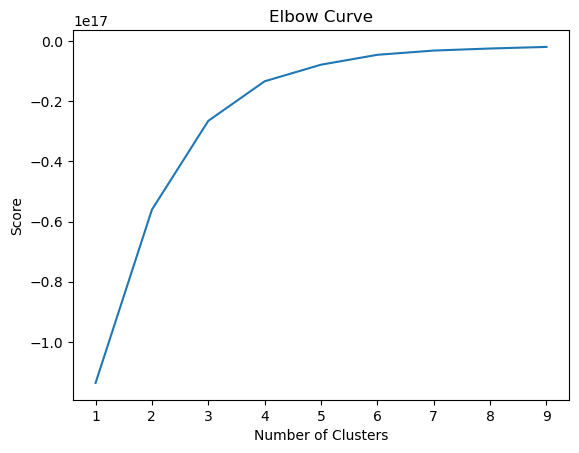

In [20]:
#Plot elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
## Optimal number of clusters seems to be 4 as after 4 the line really flattens.

## k mean clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [23]:
kmeans.fit(DF2)

/Users/winsontom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [24]:
DF2['clusters'] = kmeans.fit_predict(DF2)

/Users/winsontom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_25393/556746481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF2['clusters'] = kmeans.fit_predict(DF2)


In [26]:
DF2.head(5)

,Bedrooms,Bathrooms,Price,Square Footage,Price Per Square Feet,Zipcode,clusters
0,2,2,315000,1400,225.00,10022,0
1,7,10,195000000,17545,11114.28,10019,2
2,4,2,260000,2015,129.03,10312,0
3,3,1,69000,445,155.06,10022,0
4,7,2,55000000,14175,3880.07,10065,1


In [27]:
DF2['clusters'].value_counts()

clusters
0    4274
3     232
1      45
2       1
Name: count, dtype: int64

/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


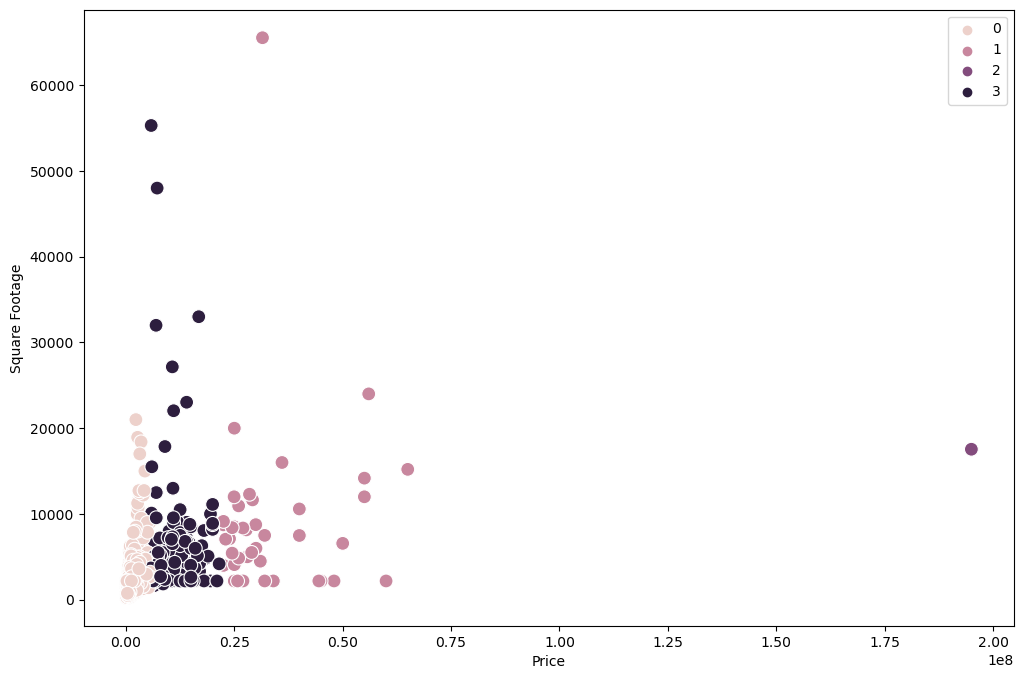

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=DF2['Price'], y=DF2['Square Footage'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Square Footage') # Label y-axis.
plt.show()

In [ ]:
#Takeaway from ^ is that there are a range of prices from 0-0.5 primarilly. However the square footage really varies. 

/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


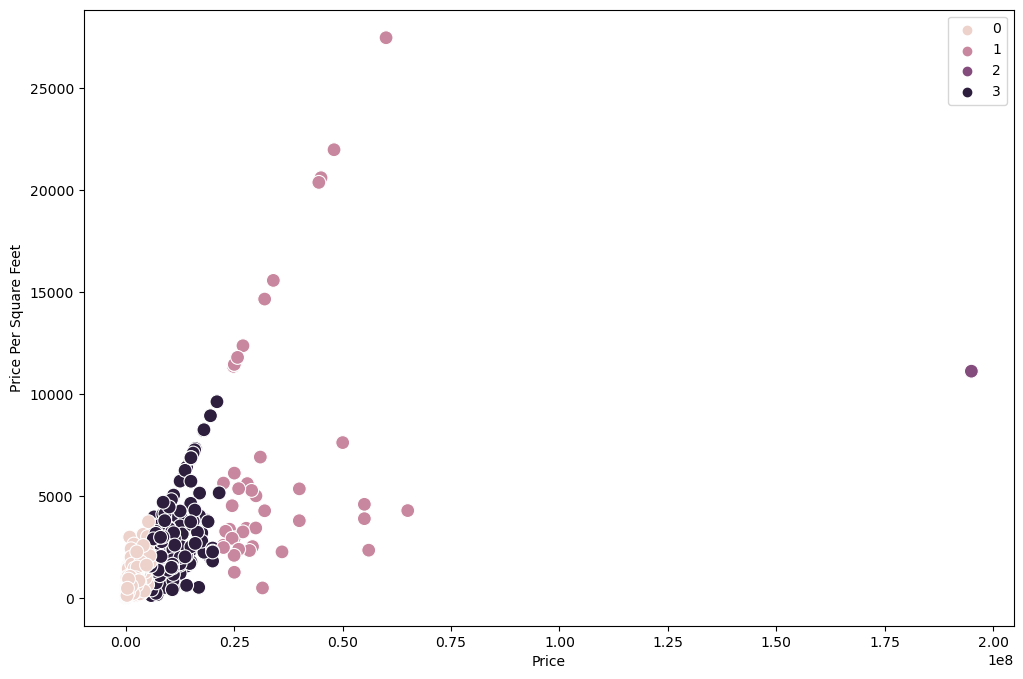

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=DF2['Price'], y=DF2['Price Per Square Feet'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Price Per Square Feet') # Label y-axis.
plt.show()

In [ ]:
#Takeaway from ^ as price increases so does price per square feet.

/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


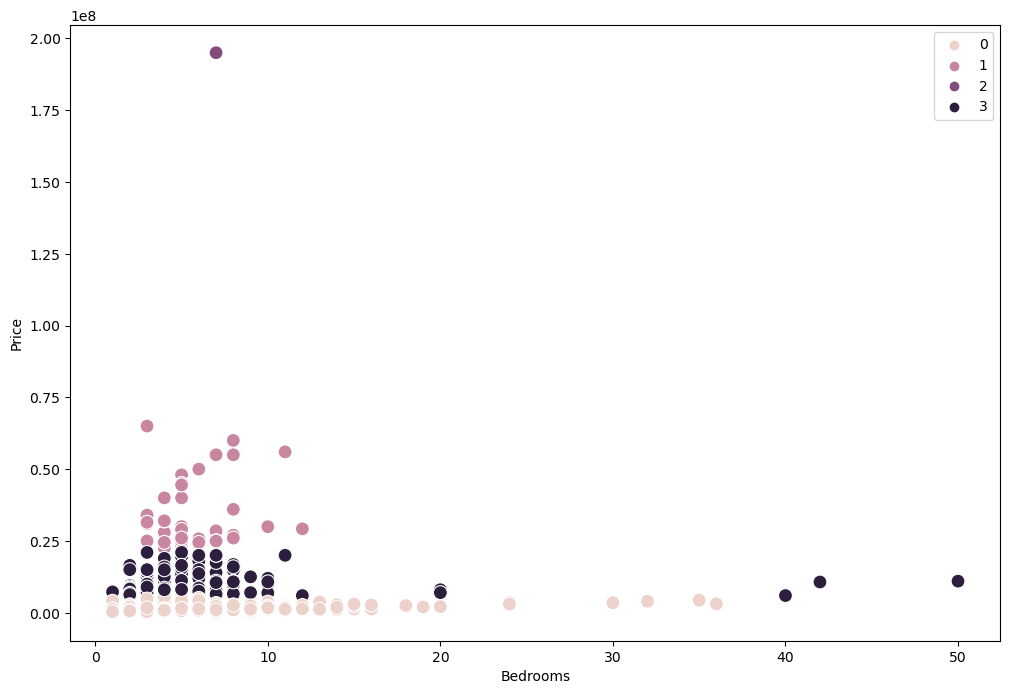

In [32]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=DF2['Bedrooms'], y=DF2['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bedrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

In [ ]:
#More expensive does not necessarily mean more Bedrooms

In [34]:
DF2.loc[DF2['clusters'] == 2, 'cluster'] = 'dark purple'
DF2.loc[DF2['clusters'] == 1, 'cluster'] = 'purple'
DF2.loc[DF2['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_25393/2380348421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF2.loc[DF2['clusters'] == 2, 'cluster'] = 'dark purple'
/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_25393/2380348421.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DF2.loc[DF2['clusters'] == 2, 'cluster'] = 'dark purple'


In [35]:
DF2.groupby('cluster').agg({'Price':['mean', 'median'], 
                         'Price Per Square Feet':['mean', 'median'], 
                         'Bedrooms':['mean', 'median'] })

Price              Price Per Square Feet            \
                     mean       median                  mean    median   
cluster                                                                  
dark purple  1.950000e+08  195000000.0          11114.280000  11114.28   
pink         1.086413e+06     780000.0            596.720288    460.33   
purple       3.283956e+07   28000000.0           7188.034889   4583.33   

             Bedrooms         
                 mean median  
cluster                       
dark purple  7.000000    7.0  
pink         3.232803    3.0  
purple       5.777778    5.0

In [ ]:
Propose what these results could be useful for in future steps of an analytics pipeline.